In [2]:
from __future__ import division

import itertools
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib import gridspec
from IPython.display import Image
import datetime
import numpy as np 
import scipy as sp 
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
import cmath
from matplotlib import rc
from matplotlib import cm 
import time
import random
from scipy import interpolate
import os
from scipy import special
import sys
from fractions import Fraction
import importlib

from IPython.core.pylabtools import figsize, getfigs
%matplotlib inline

from FUNCTIONS_2_LEG_LADDER_SINGLE_PARTICLE import *

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rc('font', family='serif', size=15)
plt.rc('text', usetex=True)

I=1j


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#SOURCE NON-INTERACTING CODE
importlib.reload(sys.modules['FUNCTIONS_2_LEG_LADDER_SINGLE_PARTICLE'])

<module 'FUNCTIONS_2_LEG_LADDER_SINGLE_PARTICLE' from '/home/filippone/Fisica/Research/2023_HALL_CONSTANT_COLD_ATOMS/code/FUNCTIONS_2_LEG_LADDER_SINGLE_PARTICLE.py'>

# Some general considerations about the comparison between code and physical quantities

## Theoretical quantities
#### Hamiltonian $\mathcal H=-t_x\sum_{j,m=0}^{L_y-1}\Big[e^{-i\varphi(m-m_0)}c^\dagger_{j,m}c^{\phantom\dagger}_{j+1,m}+\mbox{h.c.}\Big]-t_y\sum_{j,m=0}^{L_y-2}\Big[c^{\dagger}_{j,m}c^{\phantom\dagger}_{j,m+1}+\mbox{h.c.}\Big]+E_y\sum_{j,m=0}^{L_y-1}(m-m_0)n_{j,m}\,.$
#### Polarization density $p_y=\frac1{L_xL_y}\sum_{j,m=0}^{L_y-1}(m-m_0)\langle n_{j,m}\rangle$
#### Current density $j_x=-\frac {t_x}{L_xL_y}\sum_{j,m}\Big[ie^{-i\varphi(m-m_0)}c^\dagger_{j,m}c^{\phantom \dagger}_{j+1,m}-ie^{i\varphi(m-m_0)}c^\dagger_{j+1,m}c^{\phantom \dagger}_{j,m}\Big]$
###### with $m_0=(L_y-1)/2$

### In the universal regime you are supposed to find : 
#### $p_y=[-\varphi j_x+E_yn]2\mathcal I^{(L_y)}_{0,0}$         and               $\frac{ E_{y0}}{j_x}=\frac\varphi n$
#### where $\mathcal I^{(L_y)}_{00}$ depends on the number of legs. $I^{(2)}_{0,0}=-\frac1{8t_y}$ (you have to calculate the general case)

### For $L_y=2$
####  $p_y=\frac1{L_xL_y}\sum_j\frac{\langle n_{j,1}\rangle-\langle n_{j,0}\rangle}2$

## For $L_y=3$
#### $p_y=\frac1{L_xL_y}\sum_j\Big[\langle n_{j,2}\rangle-\langle n_{j,0}\rangle\Big]$       (mind the absence of the factor 2 in the denominator!)

## Correspondence to Code "FUNCTIONS_2_LEG_LADDER_SINGLE_PARTICLE" quantities
#### $J^{(2)}_{x,\rm code}=L_xL_y j_x$  
#### $P^{(2)}_{y,\rm code}=2L_xL_yp_y$
#### $E^{(2)}_{y,\rm code}=\frac {E_y}2$ 
#### In the universal regime, you thus expect 
#### $P^{(2)}_{y,\rm code}=[-2\varphi J^{(2)}_{x,\rm code}+4N_{\rm tube}E^{(2)}_{y,\rm code})]I^{(2)}_{0,0}$ 
#### and 
#### $\lim_{\varphi\rightarrow0}\frac {J^{(2)}_{x,\rm code}}{N_{\rm tube}E^{(2)}_{y0,\rm code}}=\frac 2\varphi$

## Correspondence to "Experiment" quantities
#### $J^{(2)}_{\rm exp}=\frac1{2t_xN_{\rm tot}}\sum_{\rm tube}J^{(2)}_{x,\rm code,tube}$  
#### as, in principle, $E^{(2)}_{y0,\rm exp}=2E^{(2)}_{y0,\rm code}/t_x=2E^{(2)}_{y0}/t_x$ we should have 
#### $\lim_{\varphi\rightarrow0}\frac {J^{(2)}_{x,\rm exp}}{E^{(2)}_{y0,\rm exp}}=\frac 1{2\varphi}$
#### A theoretical question is whether this, in the $t_y\gg t_x$ limit is also given by
#### $\frac {J^{(2)}_{x,\rm exp}}{E^{(2)}_{y0,\rm exp}}=\frac 1{4\tan(\varphi/2)}$
#### with only requirement $\varphi<\pi/2$.

## TEST SINGLE PARTICLE SPECTRUM obc - noconfinement ($W=0$)

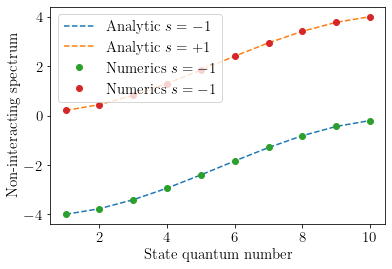

In [12]:
(tx,ty,chi,L)=(1,2.1,0.3,10)
knumbers=np.array([np.pi*x/(L+1) for x in range (1,L+1)])
num_spec=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,0))[0]

plt.plot(knumbers/np.pi*(L+1), spec_non_int(tx,ty,knumbers,chi,-1),'--',label=r'Analytic $s=-1$')
plt.plot(knumbers/np.pi*(L+1), spec_non_int(tx,ty,knumbers,chi,+1),'--',label=r'Analytic $s=+1$')

plt.plot(knumbers/np.pi*(L+1), num_spec[0:L],'o',label=r'Numerics $s=-1$')
plt.plot(knumbers/np.pi*(L+1), num_spec[L:2*L],'o',label=r'Numerics $s=-1$')

plt.xlabel('State quantum number')
plt.ylabel('Non-interacting spectrum')
plt.legend()
plt.show()

# Real-time evolution  - No confinement ($W=0$) and zero temperature ($T=0$)

#### Linear response

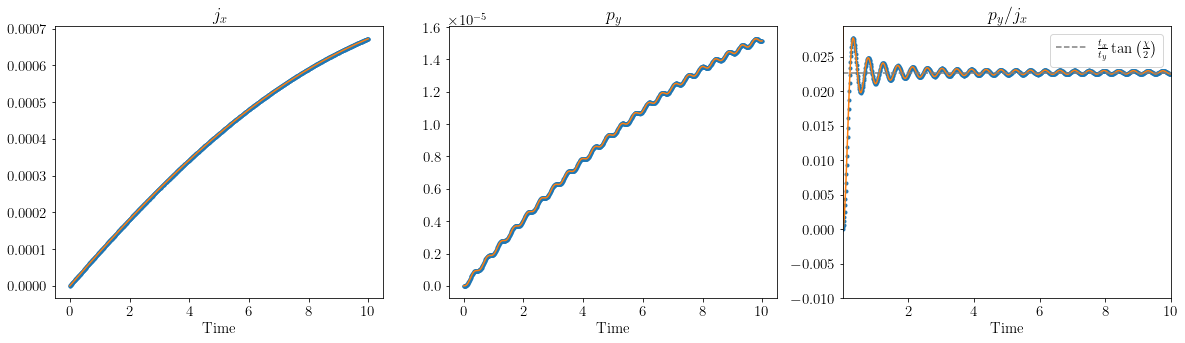

In [17]:
(tx,ty,chi,Ex,L,M,dt,tmax,W,Ey)=(1,7,0.1*np.pi,0.00001,30,5,0.01,10,0,.1)
fig,ax=plt.subplots(1,3,figsize=(20,5))
data=evolve_free_obc(L,M,tx,ty,Ex,chi,dt,tmax,W=0,T=0,chem_pot=0)
ax[0].plot(data[0],np.real(data[1]),'.')
ax[1].plot(data[0],-np.real(np.array(data[2])),'.')
ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'.')
[spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
[spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,0))
data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax)
ax[0].plot(data[0],np.real(data[1]),'-')
ax[1].plot(data[0],-np.real(np.array(data[2])),'-')
ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')
ax[2].axhline(1./ty*np.tan(chi/2),0,tmax,linestyle='dashed',color='gray',\
              label=r'$\frac{t_x}{t_y}\tan\left(\frac\chi2\right)$')

ax[2].set_ylim(-0.01,1./ty*np.tan(chi/2)*1.3)
ax[2].set_xlim(0.0001,tmax)
ax[0].set_title(r'$j_x$')
ax[1].set_title(r'$p_y$')
ax[2].set_title(r'$p_y/j_x$')
for x in range(0,3):
    ax[x].set_xlabel('Time')
ax[2].legend()
plt.show()

### Finite size effects

20 30 50 100 

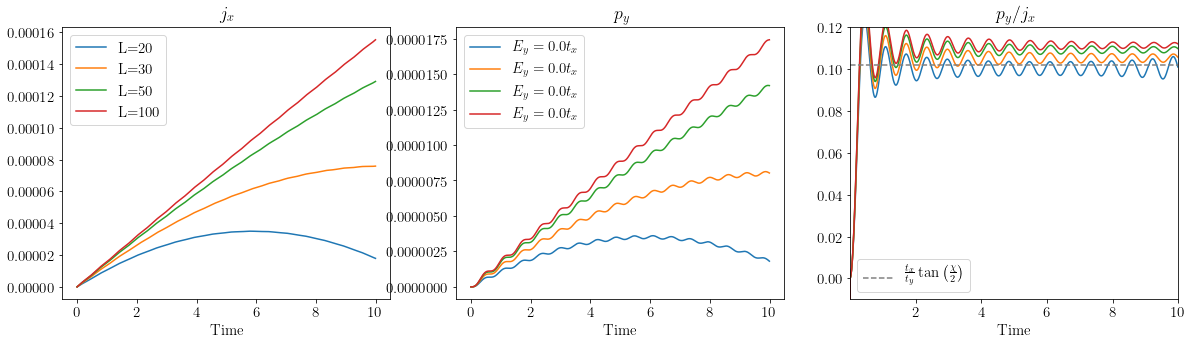

In [8]:
(tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(1,5,0.3*np.pi,0.000001,10,0.0,0.01,10,0,0)
fig,ax=plt.subplots(1,3,figsize=(20,5))
L_List=[20,30,50,100]
Ey_List=[0]
for L in L_List:
    print(L,end=' ')        
    for Ey in Ey_List:
        data=evolve_free_obc(L,M,tx,ty,Ex,chi,dt,tmax,W,T,chem_pot,Ey)
        ax[0].plot(data[0],np.real(data[1]),'-',label='L=%d'%L)
        ax[1].plot(data[0],-np.real(np.array(data[2])),'-',label='$E_y=%.1ft_x$'%Ey)
        ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')
ax[2].axhline(1./ty*np.tan(chi/2),0,tmax,linestyle='dashed',color='gray',\
              label=r'$\frac{t_x}{t_y}\tan\left(\frac\chi2\right)$')
ax[2].set_ylim(-0.01,0.12)
ax[2].set_xlim(0.0001,tmax)
ax[0].set_title(r'$j_x$')
ax[1].set_title(r'$p_y$')
ax[2].set_title(r'$p_y/j_x$')
for x in range(0,3):
    ax[x].set_xlabel('Time')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

### Add transverse field $E_y\neq0$ to counter finite polarization

-1e-05 

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-5e-06 0.0 5e-06 1e-05 

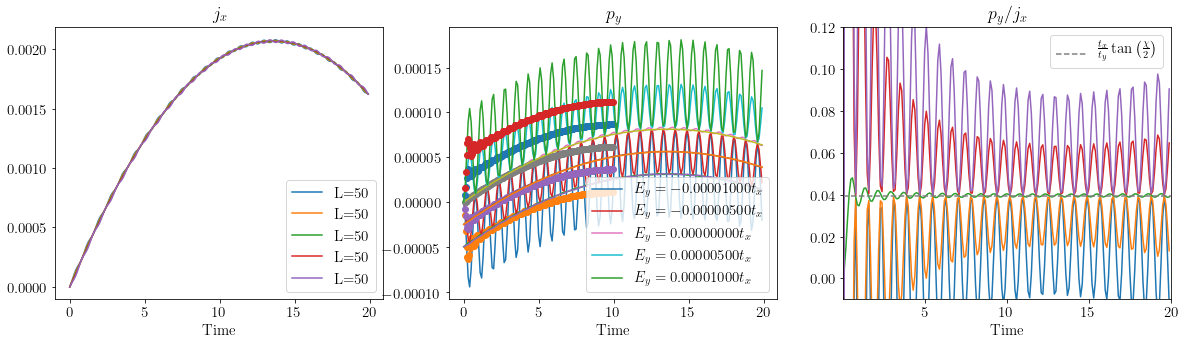

In [127]:
(tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(1,4,0.1*np.pi,0.00001,20,0.00,0.1,20,0,0)
fig,ax=plt.subplots(1,3,figsize=(20,5))
L_List=[50]
Ey_List=np.linspace(-1,1,5)*Ex
for L in L_List:
    for Ey in Ey_List:
        print(Ey,end=' ')
        [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
        #Implement the correct quench both in Ex and Ey
        [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
        data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
        #data=evolve_free_obc(L,M,tx,ty,Ex,chi,dt,tmax,W,T,chem_pot,Ey)
        #Plot Jx
        ax[0].plot(data[0],np.real(data[1]),'-',label='L=%d'%L)
        #PlotPy
        ax[1].plot(data[0],-np.real(np.array(data[2])),'-',label='$E_y=%.8ft_x$'%Ey)
        #Plot average py
        py_av_time=[np.average(-np.real(np.array(data[2][1:x]))) for x in range(1,len(data[0]))] 
        ax[1].plot(data[0][1:]/2,py_av_time,'o')
        #ax[1].plot(data[0][1:],py_av_time,'o')
        #Plot estimate
        ax[1].plot(data[0],(np.real(data[1])*chi/2-np.abs(Ey)*M)/ty,'-')
        #Plot py/jx
        ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')
        
ax[2].axhline(1./ty*np.tan(chi/2),0,tmax,linestyle='dashed',color='gray',\
              label=r'$\frac{t_x}{t_y}\tan\left(\frac\chi2\right)$')
ax[2].set_ylim(-0.01,0.12)
ax[2].set_xlim(0.0001,tmax)
ax[0].set_title(r'$j_x$')
ax[1].set_title(r'$p_y$')
ax[2].set_title(r'$p_y/j_x$')
for x in range(0,3):
    ax[x].set_xlabel('Time')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

##### Average over time span $\mbox{Time}\in[1,5]$ as function of $E_y$

In [130]:
(tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(1,4,0.01*np.pi,0.00001,4,0.00,0.1,10,0,0)
L_List=[100]
M_List=[x for x in range(1,22)]
Ey_List=np.linspace(-1,1,4)*Ex
Data_Averaged_List=[]
for L in L_List:
    [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
    for Ey in Ey_List:
        print(Ey,end=' ')
        [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
        for M in M_List:
            print(M,end=' ')
            data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
            py_average=-np.real(np.average(data[2][10:50]))
            jx_average=np.real(np.average(data[1][10:50]))
            Data_Averaged_List.append([M,Ey,jx_average,py_average])
Data_Averaged_Array=np.array(Data_Averaged_List).T

-1e-05 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 -3.333333333333334e-06 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 3.333333333333333e-06 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 1e-05 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

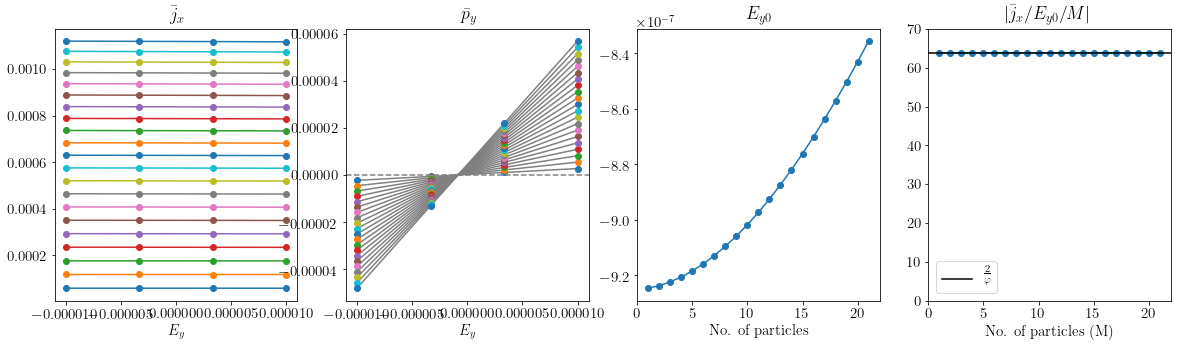

In [140]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
Ey0=[]
JxAV=[]
for M in M_List:
    x=Ey_List
    start=(M-1)*len(Ey_List)
    end=start+len(Ey_List)
    #JX
    y=[x[2] for x in Data_Averaged_List[M-1::M_List[-1]]]
    ax[0].plot(x,y,'o-')
    JxAV.append(y[0])
    #PY
    y=[x[3] for x in Data_Averaged_List[M-1::M_List[-1]]]
    #make and plot linear fit
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef) 
    ax[1].plot(x,y,'o')
    ax[1].plot(x,poly1d_fn(x),zorder=0,color='gray')
    Ey0.append(-poly1d_fn[0]/poly1d_fn[1])
#JX
ax[0].set_xlabel(r'$E_y$')
ax[0].set_title(r'$\bar j_x$')
#Py
ax[1].set_xlabel(r'$E_y$')
ax[1].set_title(r'$\bar p_y$')
ax[1].axhline(0,linestyle='dashed',color='gray')
#EY0
ax[2].plot(M_List,Ey0,'o-')
ax[2].set_xlabel('No. of particles')
ax[2].set_title(r'$E_{y0}$')
#RH
ax[3].plot(M_List,[-JxAV[x]/Ey0[x]/M_List[x]for x in range (0,len(Ey0))],'o-')
ax[3].set_xlabel('No. of particles (M)')
ax[3].set_title(r'$|\bar j_x/E_{y0}/M|$')
ax[3].set_ylim(0,2/chi*1.1)
#Theoretical prediction
ax[3].axhline(2/chi,linestyle='solid',color='black',label=r'$\frac2\varphi$')
ax[3].legend()

plt.show()

# Deviations from "ideal" case

# Define routines

In [19]:
def plotter_real_time(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot):
    fig,ax=plt.subplots(1,3,figsize=(20,5))
    L_List=[L]
    Ey_List=np.linspace(-1,1,5)*Ex
    for L in L_List:
        for Ey in Ey_List:
            print(Ey,end=' ')
            [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
            #Implement the correct quench both in Ex and Ey
            [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
            data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
            #data=evolve_free_obc(L,M,tx,ty,Ex,chi,dt,tmax,W,T,chem_pot,Ey)
            #Plot Jx
            ax[0].plot(data[0],np.real(data[1]),'-',label=r'$E_y=%.8f$'%Ey)
            #PlotPy
            ax[1].plot(data[0],-np.real(np.array(data[2])),'-',label='$E_y=%.8ft_x$'%Ey)
            #Plot average py
            py_av_time=[np.average(-np.real(np.array(data[2][1:x]))) for x in range(1,len(data[0]))] 
            ax[1].plot(data[0][1:]/2,py_av_time,'o')
            #Plot estimate
            ax[1].plot(data[0],(np.real(data[1])*chi/2-np.abs(Ey)*M)/ty,'-')
            #Plot py/jx
            ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')

    ax[2].axhline(1./ty*np.tan(chi/2),0,tmax,linestyle='dashed',color='gray',\
                  label=r'$\frac{t_x}{t_y}\tan\left(\frac\chi2\right)$')
    ax[2].set_ylim(-0.01,1./ty*np.tan(chi/2)*1.1)
    ax[2].set_xlim(0.0001,tmax)
    ax[0].set_title(r'$j_x$')
    ax[1].set_title(r'$p_y$')
    ax[2].set_title(r'$p_y/j_x$')
    for x in range(0,3):
        ax[x].set_xlabel('Time')
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.show()
    return 0

def real_time_averaging(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot,Ey_List):
    L_List=[L]
    M_List=[x for x in range(1,Mmax)]
    Data_Averaged_List=[]
    for L in L_List:
        [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
        for Ey in Ey_List:
            print(Ey,end=' ')
            [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
            for M in M_List:
                data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
                py_average=-np.real(np.average(data[2][10:50]))
                jx_average=np.real(np.average(data[1][10:50]))
                Data_Averaged_List.append([M,Ey,jx_average,py_average])
    #Data_Averaged_Array=np.array(Data_Averaged_List).T
    return Data_Averaged_List


def plotter_averages(Data_Averaged_List,Ey_List,chi):
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    Ey0=[]
    JxAV=[]
    for M in M_List:
        x=Ey_List
        start=(M-1)*len(Ey_List)
        end=start+len(Ey_List)
        #JX
        y=[x[2] for x in Data_Averaged_List[M-1::M_List[-1]]]
        ax[0].plot(x,y,'o-')
        JxAV.append(y[0])
        #PY
        y=[x[3] for x in Data_Averaged_List[M-1::M_List[-1]]]
        #make and plot linear fit
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
        ax[1].plot(x,y,'o')
        ax[1].plot(x,poly1d_fn(x),zorder=0,color='gray')
        Ey0.append(-poly1d_fn[0]/poly1d_fn[1])
    #JX
    ax[0].set_xlabel(r'$E_y$')
    ax[0].set_title(r'$\bar j_x$')
    #Py
    ax[1].set_xlabel(r'$E_y$')
    ax[1].set_title(r'$\bar p_y$')
    ax[1].axhline(0,linestyle='dashed',color='gray')
    #EY0
    ax[2].plot(M_List,Ey0,'o-')
    ax[2].set_xlabel('No. of particles')
    ax[2].set_title(r'$E_{y0}$')
    #RH
    ax[3].plot(M_List,[-JxAV[x]/Ey0[x]/M_List[x]for x in range (0,len(Ey0))],'o-')
    ax[3].set_xlabel('No. of particles (M)')
    ax[3].set_title(r'$|\bar j_x/E_{y0}/M|$')
    ax[3].set_ylim(0,2/chi*1.1)
    #Theoretical prediction
    ax[3].axhline(2/chi,linestyle='solid',color='black',label=r'$\frac2\varphi$')
    ax[3].legend()

    #ax[0].set_ylim(0,Data_Averaged_Array[2][0]*1.1)
    plt.show()
    return 0



## 1. Strong magnetic flux ($\varphi=0.32\pi$)

-1e-05 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-5e-06 0.0 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


5e-06 1e-05 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


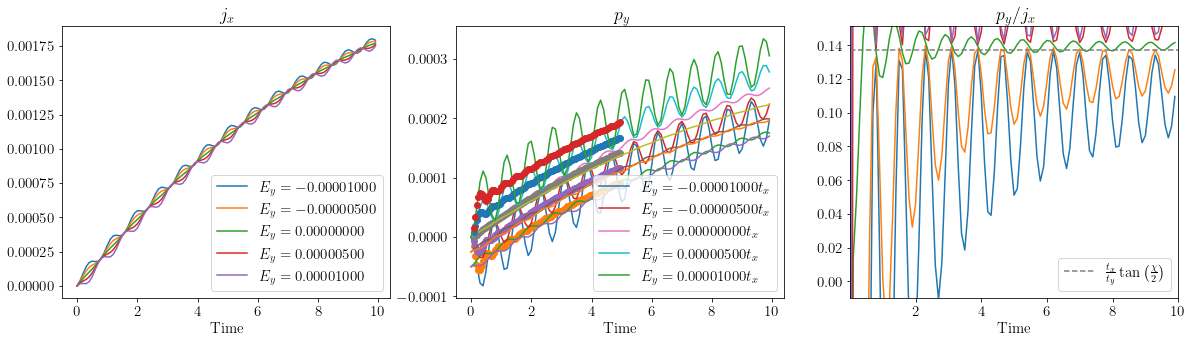

0

In [20]:
(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(50,1,4,0.32*np.pi,0.00001,20,0.00,0.1,10,0,0)
plotter_real_time(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)

In [75]:
(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot)=(100,31,1,4,0.32*np.pi,0.00001,0.00,0.1,5.1,0,0)
Ey_List=np.linspace(-3,2,4)*Ex
Data_Averaged_List=real_time_averaging(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot,Ey_List)

-3.0000000000000004e-05 -1.3333333333333333e-05 3.333333333333335e-06 2e-05 

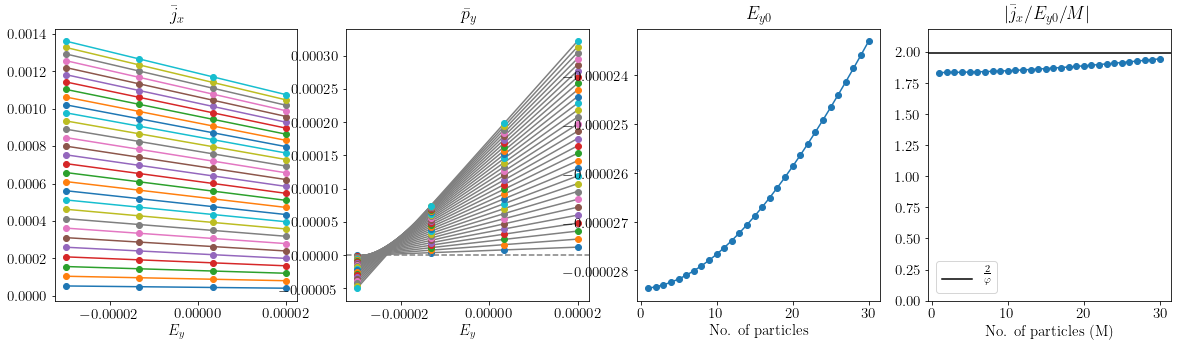

0

In [79]:
plotter_averages(Data_Averaged_List,Ey_List,chi)

## 2. Confinement ($W=0.01t_x$)

-1e-05 -5e-06 0.0 5e-06 1e-05 

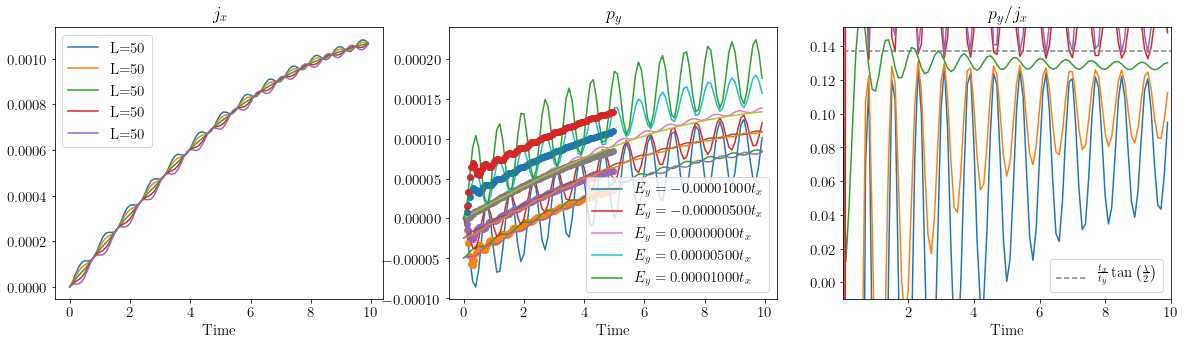

0

In [88]:
(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(50,1,4,0.32*np.pi,0.00001,20,0.01,0.1,10,0,0)
plotter_real_time(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)

In [81]:
(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot)=(100,31,1,4,0.32*np.pi,0.00001,0.01,0.1,5.1,0,0)
Ey_List=np.linspace(-3,2,4)*Ex
Data_Averaged_List=real_time_averaging(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot,Ey_List)

-3.0000000000000004e-05 -1.3333333333333333e-05 3.333333333333335e-06 2e-05 

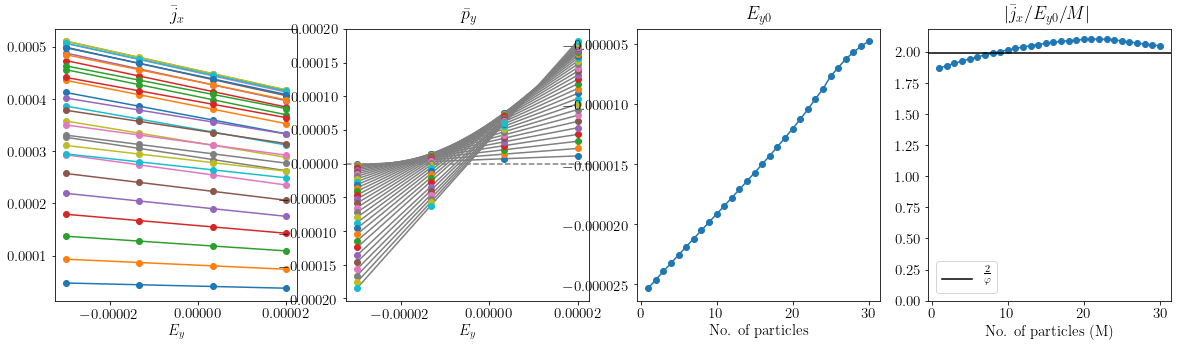

0

In [83]:
plotter_averages(Data_Averaged_List,Ey_List,chi)

## 3. Strong drive ($E_x=0.5t_x$)

-0.5 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-0.25 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.0 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.25 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.5 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


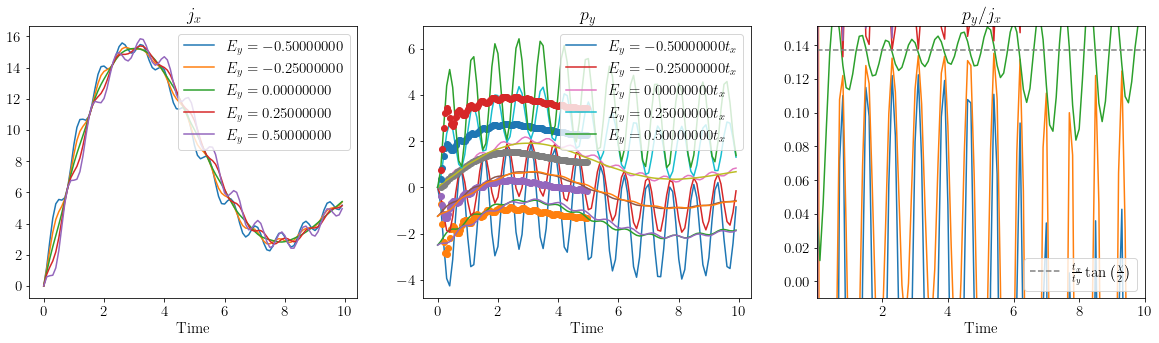

0

In [21]:
(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)=(100,1,4,0.32*np.pi,0.5,20,0.01,0.1,10,0,0)
plotter_real_time(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)

In [22]:
(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot)=(100,31,1,4,0.32*np.pi,0.5,0.01,0.1,5.1,0,0)
Ey_List=np.linspace(-3,2,4)*Ex
Data_Averaged_List=real_time_averaging(L,Mmax,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot,Ey_List)

-1.5 -0.6666666666666666 0.16666666666666674 1.0 

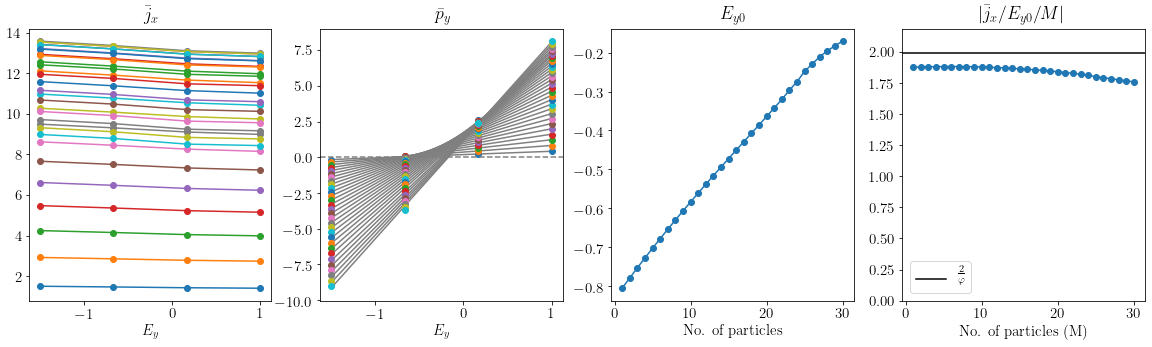

0

In [97]:
plotter_averages(Data_Averaged_List,Ey_List,chi)

# 4 Finite temperatures ($T>0$)

In [23]:
#####################################
#FINITE TEMPERATURES
#####################################

def real_time_averaging_finite_temperature(L,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot_list,Ey_List):
    Data_Averaged_List=[]
    [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
    for chem_pot in chem_pot_list:
        M=number_of_particles_vs_chemical_potential(spec0,T,chem_pot)
        for Ey in Ey_List:
            #print(Ey,end=' ')
            [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
            #print(M,end=' ')
            data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
            py_average=-np.real(np.average(data[2][10:50]))
            jx_average=np.real(np.average(data[1][10:50]))
            Data_Averaged_List.append([M,Ey,jx_average,py_average])
        #Data_Averaged_Array=np.array(Data_Averaged_List).T
    return Data_Averaged_List

def plotter_averages_finite_temperatures(Data_Averaged_List,Ey_List,chi,chem_pot_list):
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    Ey0=[]
    JxAV=[]
    M_List=[x[0] for x in Data_Averaged_List[0::len(Ey_List)]]
    for M in range (0,len(chem_pot_list)):
        x=Ey_List
        #JX
        y=[z[2] for z in Data_Averaged_List[M*len(Ey_List):(M+1)*(len(Ey_List))]]
        ax[0].plot(x,y,'o-')
        JxAV.append(y[0])
        #PY
        y=[x[3] for x in Data_Averaged_List[M*len(Ey_List):(M+1)*(len(Ey_List))]]
        #make and plot linear fit
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
        ax[1].plot(x,y,'o')
        ax[1].plot(x,poly1d_fn(x),zorder=0,color='gray')
        Ey0.append(-poly1d_fn[0]/poly1d_fn[1])
    #JX
    ax[0].set_xlabel(r'$E_y$')
    ax[0].set_title(r'$\bar j_x$')
    #Py
    ax[1].set_xlabel(r'$E_y$')
    ax[1].set_title(r'$\bar p_y$')
    ax[1].axhline(0,linestyle='dashed',color='gray')
    #EY0
    ax[2].plot(M_List,Ey0,'o-')
    ax[2].set_xlabel('No. of particles')
    ax[2].set_title(r'$E_{y0}$')
    #RH
    ax[3].plot(M_List,[-JxAV[x]/Ey0[x]/M_List[x]for x in range (0,len(Ey0))],'o-')
    ax[3].set_xlabel('No. of particles (M)')
    ax[3].set_title(r'$|\bar j_x/E_{y0}/M|$')
    ax[3].set_ylim(0,2/chi*1.1)
    #Theoretical prediction
    ax[3].axhline(2/chi,linestyle='solid',color='black',label=r'$\frac2\varphi$')
    ax[3].legend()

    #ax[0].set_ylim(0,Data_Averaged_Array[2][0]*1.1)
    plt.show()
    return 0

### Benchmark real-time evolution  - without confinement ($W=0$) and temperature ($T>0$)

##### Linear response  - benchmark with temperature

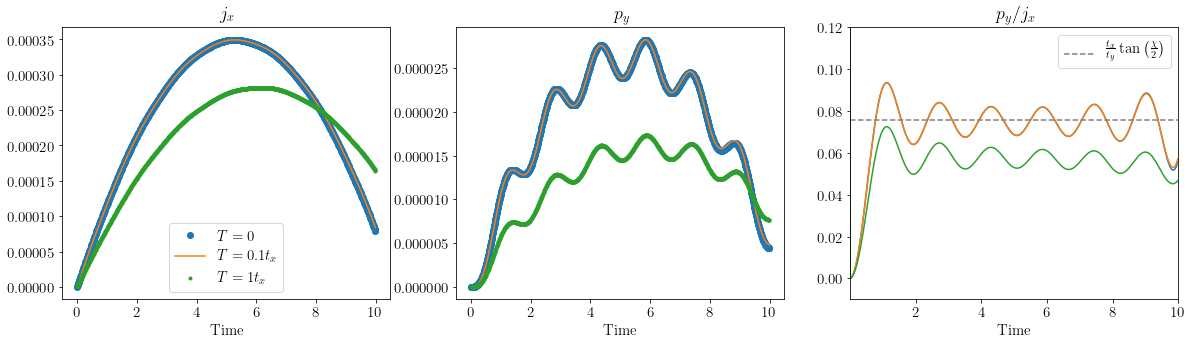

In [11]:
#To be sure that you are at quarter-filling with chemical potential equal to -ty you have to remove the
#confinement and put M=L/2 at T=0
(tx,ty,chi,Ex,L,M,W,dt,tmax)=(1,2,0.3,0.00001,20,10,0.00,0.01,10)
fig,ax=plt.subplots(1,3,figsize=(20,5))

[spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
[spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey=0))

data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T=0,chem_pot=0)
ax[0].plot(data[0],np.real(data[1]),'o',label=r'$T=0$')
ax[1].plot(data[0],-np.real(np.array(data[2])),'o')
ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')

data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T=0.1,chem_pot=-ty)
ax[0].plot(data[0],np.real(data[1]),'-',label=r'$T=0.1t_x$')
ax[1].plot(data[0],-np.real(np.array(data[2])),'-')
ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')

data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T=1,chem_pot=-ty)
ax[0].plot(data[0],np.real(data[1]),'.',label=r'$T=1t_x$')
ax[1].plot(data[0],-np.real(np.array(data[2])),'.')
ax[2].plot(data[0],-np.real(np.array(data[2])/np.array(data[1])),'-')

ax[2].axhline(1./ty*np.tan(chi/2),0,tmax,linestyle='dashed',color='gray',\
              label=r'$\frac{t_x}{t_y}\tan\left(\frac\chi2\right)$')
ax[2].set_ylim(-0.01,0.12)
ax[2].set_xlim(0.0001,tmax)
ax[0].set_title(r'$j_x$')
ax[0].legend()
ax[1].set_title(r'$p_y$')
ax[2].set_title(r'$p_y/j_x$')
for x in range(0,3):
    ax[x].set_xlabel('Time')
ax[2].legend()
plt.show()

### Produce Data 

-0.5 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-0.25 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.0 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.25 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.5 

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


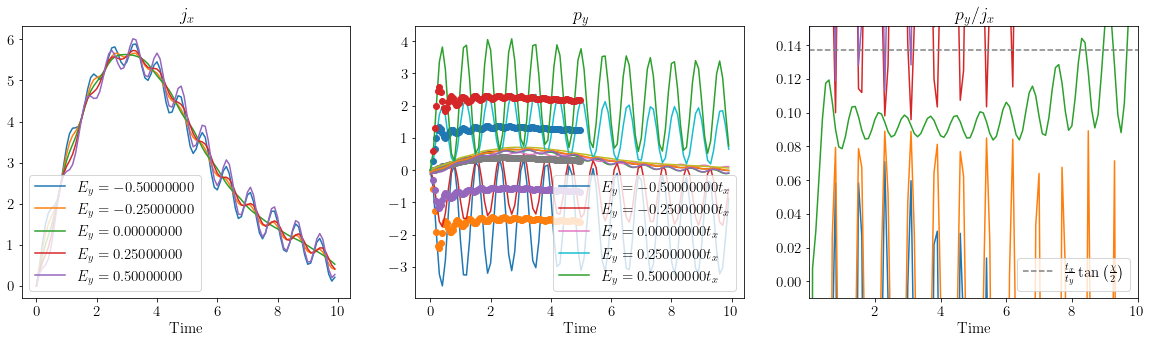

0

In [27]:
(L,tx,ty,chi,Ex,W,dt,tmax,T)=(50,1,4,0.32*np.pi,0.5,0.01,0.1,10,3)
chem_pot=-ty
M=1
plotter_real_time(L,tx,ty,chi,Ex,M,W,dt,tmax,T,chem_pot)

In [81]:
(L,tx,ty,chi,Ex,W,dt,tmax,T)=(100,1,2,0.32*np.pi,0.5,0.01,0.1,10,1)
chem_pot_list=ty*np.arange(-1,0.1,.2)
Ey_List=np.linspace(-3,2,4)*Ex
data=real_time_averaging_finite_temperature(L,tx,ty,chi,Ex,W,dt,tmax,T,chem_pot_list,Ey_List)

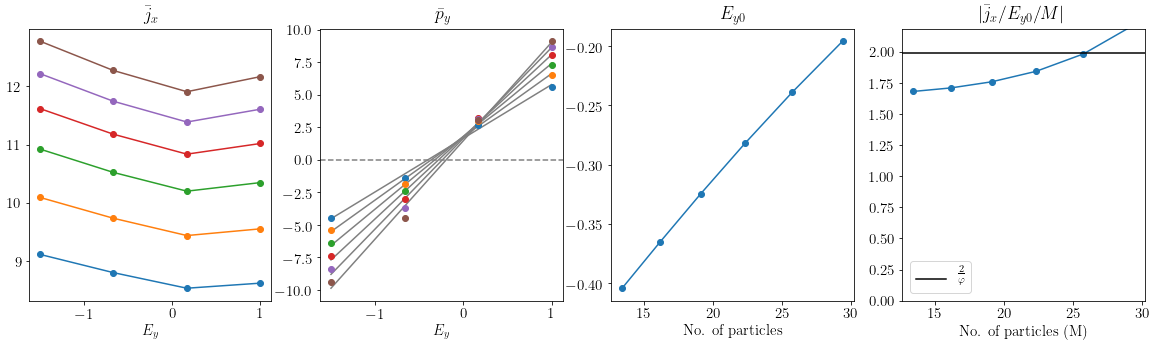

0

In [82]:
plotter_averages_finite_temperatures(data,Ey_List,chi,chem_pot_list)

# Particle number versus chemical potential -- Tabulation


###### Create data

In [98]:
(tx,ty,chi,W,data_folder)=(1,8,0.32*np.pi,0.01,'data/')
L_list=[200]
T_list=[1.5,2.5,3,4]
chem_lim=30
chem_pot_list=tx*np.arange(-chem_lim,chem_lim,chem_lim/10000)
for L in L_list:
    print(L, end=' ')
    [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
    for T in T_list:
        M_list=[]
        for chem_pot in chem_pot_list:
                M_list.append(number_of_particles_vs_chemical_potential(spec0,T,chem_pot))
        np.save(data_folder+'Particle_Number_vs_Chemical_Potential_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f'%(L,tx,ty,chi,W,T),[chem_pot_list,M_list])

200 

###### Plot data

20 30 50 70 100 200 

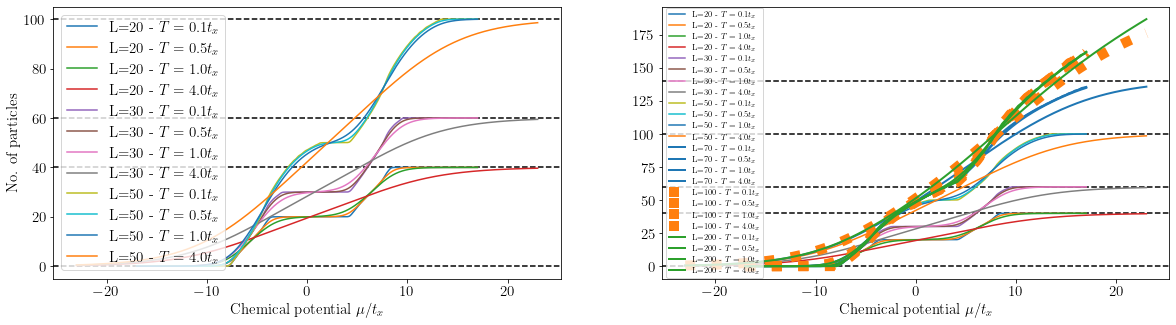

In [77]:
(tx,ty,chi,W,data_folder)=(1,6,0.32*np.pi,0.01,'data/')
fig,ax=plt.subplots(1,2,figsize=(20,5))

L_list=[20,30,50]
T_list=[0.1,0.5,1,4]


ax[0].axhline(0,linestyle='dashed',color='k')  
ax[1].axhline(0,linestyle='dashed',color='k')  

for L in L_list:
    print(L, end=' ')
    ax[0].axhline(2*L,linestyle='dashed',color='k')  
    ax[1].axhline(2*L,linestyle='dashed',color='k')  
    for T in T_list:
        chem_pot_list,M_list = np.load(data_folder+'Particle_Number_vs_Chemical_Potential_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f.npy'%(L,tx,ty,chi,W,T))    
        ax[0].plot(chem_pot_list,M_list,label=r'L=%d - $T=%.1ft_x$'%(L,T))
        ax[1].plot(chem_pot_list,M_list,label=r'L=%d - $T=%.1ft_x$'%(L,T))


L_list=[70,100,200]
for L in L_list:
    ll=2
    if L==70: 
        cc='C0'
        ss='solid'
    elif L==100 : 
        cc='C1'
        ss='dotted'
        ll='10'
    elif L==200 : 
        cc='C2'
        ss='solid'
    print(L, end=' ')
    if L<100: ax[1].axhline(2*L,linestyle='dashed',color='k')  
    for T in T_list:
        chem_pot_list,M_list = np.load(data_folder+'Particle_Number_vs_Chemical_Potential_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f.npy'%(L,tx,ty,chi,W,T))    
        ax[1].plot(chem_pot_list,M_list,linestyle=ss,linewidth=ll,color=cc,label=r'L=%d - $T=%.1ft_x$'%(L,T))


ax[0].legend(fontsize='15',loc='center left')
ax[1].legend(fontsize='8',loc='center left')
ax[0].set_ylabel('No. of particles')
ax[0].set_xlabel(r'Chemical potential $\mu/t_x$')
ax[1].set_xlabel(r'Chemical potential $\mu/t_x$')

plt.show()

# Particle distributions

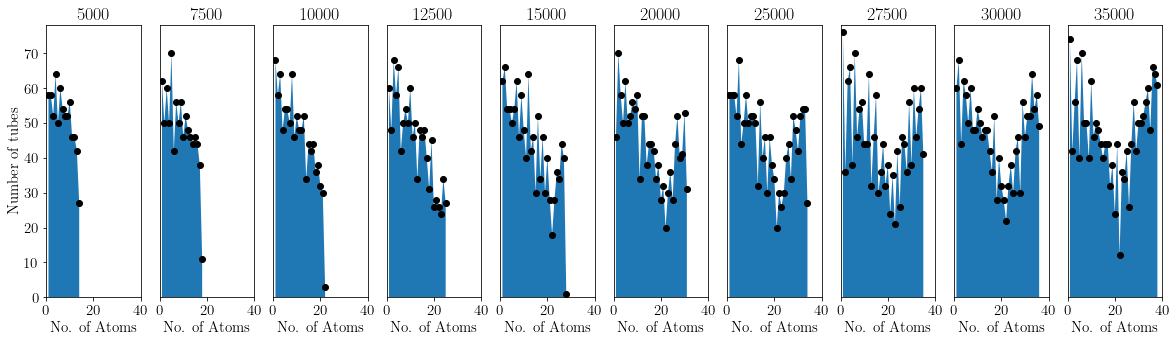

In [6]:
M_tot_list=[5000,7500,10000,12500,15000,20000,25000,27500,30000,35000]
fig,ax=plt.subplots(1,len(M_tot_list),figsize=(20,5))

for M_tot in M_tot_list:
    data=np.loadtxt('Atom_distributions/%d.txt'%M_tot).T
    ax[M_tot_list.index(M_tot)].plot(data[0],data[1],'ok')
    ax[M_tot_list.index(M_tot)].set_ylim(0,78)
    ax[M_tot_list.index(M_tot)].set_xlim(0,40)
    ax[M_tot_list.index(M_tot)].set_title(M_tot)
    ax[M_tot_list.index(M_tot)].fill_between(data[0],data[1])
    ax[M_tot_list.index(M_tot)].set_xlabel('No. of Atoms')
    if M_tot_list.index(M_tot)>0 :  ax[M_tot_list.index(M_tot)].set_yticks([])
ax[0].set_ylabel('Number of tubes')
plt.show()

##### Save parameters to find a certain M

In [99]:
(tx,ty,chi,W,data_folder)=(1,8,0.32*np.pi,0.01,'data/')
Mmax=40
M_list=[x for x in range (1,Mmax)]

L_list=[200]#[20,30,40,50,70,100,200]
T_list=[1.5,2.5,3,4]#[0.1,0.5,1,2]

for L in L_list:
    for T in T_list:
        data= np.load(data_folder+'Particle_Number_vs_Chemical_Potential_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f.npy'%(L,tx,ty,chi,W,T))
        for M in M_list:
            for x in data[1]:
                if x<M+0.01 and x>M-0.01:
                    np.save(data_folder+'Chemical_Potential_for_Particle_Number_%d_Parameters_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f'%(M,L,tx,ty,chi,W,T),data[0][data[1].tolist().index(x)])

# Averaging over tubes 

## Create data 

In [13]:
def real_time_data_producer_finite_temperature(L,M,tx,ty,chi,Ex,Ey,W,T,\
                                               spec0,eigvec0,spec1,eigvec1,dt,tmax,data_folder):
    chem_pot=np.load(data_folder+'Chemical_Potential_for_Particle_Number_%d_Parameters_\
L%d_tx_%.6f_ty_%.6f_chi_%.6f_W_%.6f_T_%.6f.npy'%(M,L,tx,ty,chi,W,T))
    #print(M,end=' ')
    data=evolve_free_obc_new(L,M,tx,chi,spec0,eigvec0,spec1,eigvec1,dt,tmax,T,chem_pot)
    np.save(data_folder+'time_evolution_grand_canonical_L_%d_M_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f\
_W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f'%(L,M,tx,ty,chi,Ex,Ey,W,T,dt,tmax),np.real(data))
    return None

In [108]:
(tx,ty,chi,Ex,W,dt,tmax,data_folder)=(1,8,0.32*np.pi,0.5,0.01,0.1,10,'data/')

L_list=[200]
Mmax=40
M_list=[x for x in range (1,Mmax)]
T_list=[1.5,2]
Ey_list=np.linspace(-3,2,4)*Ex

for T in T_list:
    for L in L_list:
        [spec0,eigvec0]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,0,chi,W,0))
        for Ey in Ey_list:
            print (T,L,Ey)
            [spec1,eigvec1]=sp.linalg.eigh(Hamiltonian_Free_OBC(L,tx,ty,Ex,chi,W,Ey))
            for M in M_list:
                print(M,end = ' ')
                real_time_data_producer_finite_temperature(L,M,tx,ty,chi,Ex,Ey,W,T,\
                                                       spec0,eigvec0,spec1,eigvec1,dt,tmax,data_folder)

1.5 200 -1.5
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1.5 200 -0.6666666666666666
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1.5 200 0.16666666666666674
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1.5 200 1.0
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2 200 -1.5
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2 200 -0.6666666666666666
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2 200 0.16666666666666674
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2 200 1.0
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 

###### Plot time traces + test finite size scaling

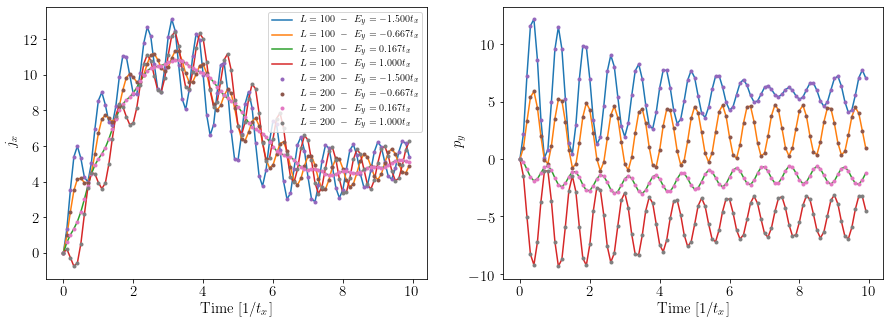

In [162]:
(tx,ty,chi,Ex,W,dt,tmax,data_folder)=(1,4,0.32*np.pi,0.5,0.01,0.1,10,'data/')
M=20

fig,ax=plt.subplots(1,2,figsize=(15,5))
Ey_list=np.linspace(-3,2,4)*Ex

L=100
for Ey in Ey_list:
    data=np.load(data_folder+'time_evolution_grand_canonical_L_%d_M_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f.npy'%(L,M,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
    ax[0].plot(data[0],data[1],'-',label='$L=%d~-~E_y=%.3ft_x$'%(L,Ey))
    ax[1].plot(data[0],data[2],'-')

L=200
for Ey in Ey_list:
    data=np.load(data_folder+'time_evolution_grand_canonical_L_%d_M_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f.npy'%(L,M,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
    ax[0].plot(data[0],data[1],'.',label='$L=%d~-~E_y=%.3ft_x$'%(L,Ey))
    ax[1].plot(data[0],data[2],'.')


ax[0].legend(fontsize=10)
ax[0].set_ylabel(r'$j_x$')
ax[1].set_ylabel(r'$p_y$')
ax[0].set_xlabel(r'Time $[1/t_x]$')
ax[1].set_xlabel(r'Time $[1/t_x]$')
plt.show()

### Produce time-averages

In [20]:
def Averages_time_and_distributions_finite_temperature\
(L,tx,ty,chi,Ex,Ey,W,T,dt,tmax,M_list,M_tot_list,data_time,data_atom):
    list_av_time_jx_fixed_numbers=[]
    list_av_time_py_fixed_numbers=[]
    times=np.arange(0,tmax,dt)
    times_rounded=[round(x,5) for x in times]
    idx_t1=times_rounded.index(1)
    idx_t5=times_rounded.index(5)
    if M_list[0]>1: print ('Sei un coglione! Non parti da uno con M_list!')
    for M in M_list:
        data=np.load(data_time+'time_evolution_grand_canonical_L_%d_M_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f.npy'%(L,M,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
        list_av_time_jx_fixed_numbers.append(np.average([data[1][idx_t1:idx_t5]]))
        list_av_time_py_fixed_numbers.append(np.average([data[2][idx_t1:idx_t5]]))
        #print(np.average([data[1][idx_t1:idx_t5]]))
    for M_tot in M_tot_list:
        distributions=np.loadtxt(data_atom+'%d.txt'%M_tot).T
        jx_tube_av=distributions[1].dot(np.array(list_av_time_jx_fixed_numbers[0:len(distributions[1])]))/M_tot        
        py_tube_av=distributions[1].dot(np.array(list_av_time_py_fixed_numbers[0:len(distributions[1])]))/M_tot
        #print(len(distributions[1]))
        #print(np.sum(list_av_time_jx_fixed_numbers[0:len(distributions[1])])/len(distributions[1]))
        np.save(data_time+'_L_%d_MTOTAL_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f_Atom'%(L,M_tot,tx,ty,chi,Ex,Ey,W,T,dt,tmax),[jx_tube_av,py_tube_av])
        #print([jx_tube_av,py_tube_av])
    return None

##### Plot different Number of particles

/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/filippone/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/filippone/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/

Averaged over tubes for M_tot=5000  -> jx_av= nan  -> py_av nan


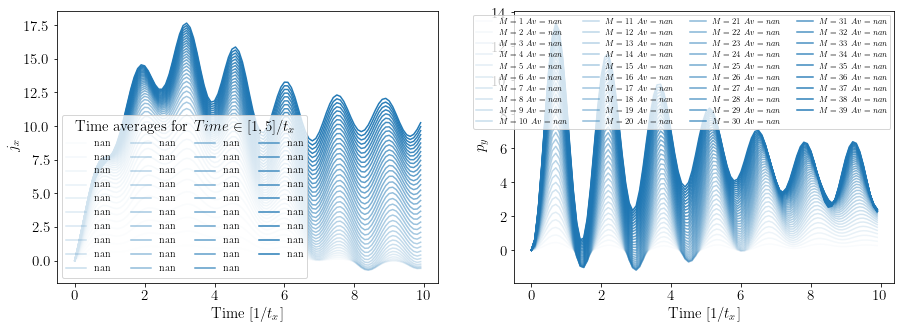

In [111]:
#(L,tx,ty,chi,Ex,W,dt,tmax,T,data_folder)=(200,1,4,0.32*np.pi,0.5,0.01,0.01,10,1,'data/')
(L,tx,ty,chi,Ex,W,dt,tmax,T,data_folder)=(200,1,2,0.32*np.pi,0.5,0.01,0.1,10,1,'data/')

fig,ax=plt.subplots(1,2,figsize=(15,5))
Ey_list=np.linspace(-3,2,4)*Ex
Ey=Ey_list[1]
Mmax=40
M_list=[x for x in range (1,Mmax)]

list_jx=[]
list_py=[]
for M in M_list:
    data=np.load(data_folder+'time_evolution_grand_canonical_L_%d_M_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f.npy'%(L,M,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
    media_t=np.average(data[1][100:500])
    media_t_py=np.average(data[2][100:500])
    list_jx.append(media_t)
    list_py.append(media_t_py)
    ax[0].plot(data[0],data[1],'-',color='C0',alpha=M/Mmax,label=round(media_t,2))
    ax[1].plot(data[0],data[2],'-',color='C0',alpha=M/Mmax,label='$M=%d~Av=%.1f$'%(M,media_t_py))

M_tot=5000
distributions=np.loadtxt('Atom_distributions/%d.txt'%M_tot).T
#print(distributions[1])
#print(list_jx)
#print(distributions[1].dot(list_jx[0:len(distributions[1])]))
print('Averaged over tubes for M_tot=%d'%M_tot,\
      ' -> jx_av=',distributions[1].dot(list_jx[0:len(distributions[1])])/M_tot,\
      ' -> py_av',distributions[1].dot(list_py[0:len(distributions[1])])/M_tot)

ax[0].legend(title=r'Time averages for $Time \in [1,5]/t_x$',loc='lower left',fontsize=10,ncol=4)
ax[1].legend(fontsize=8,ncol=4)
ax[0].set_ylabel(r'$j_x$')
ax[1].set_ylabel(r'$p_y$')
ax[0].set_xlabel(r'Time $[1/t_x]$')
ax[1].set_xlabel(r'Time $[1/t_x]$')
plt.show()

##### Produce averages over tubes

In [111]:
(L,tx,ty,chi,Ex,W,T,dt,tmax,data_times,data_atoms)=(200,1,8,0.32*np.pi,0.5,0.01,2.5,0.1,10,'data/','Atom_distributions/')
#(L,tx,ty,chi,Ex,W,T,dt,tmax,data_times,data_atoms)=(200,1,4,0.32*np.pi,0.5,0.01,.5,0.01,10,'data/','Atom_distributions/')
M_tot_list=[5000,7500,10000,12500,15000,20000,25000,27500,30000,35000]
Mmax=40
M_list=[x for x in range (1,Mmax)]
Ey_list=np.linspace(-3,2,4)*Ex
for Ey in Ey_list: 
    Averages_time_and_distributions_finite_temperature\
(L,tx,ty,chi,Ex,Ey,W,T,dt,tmax,M_list,M_tot_list,data_times,data_atoms)

##### Plot dependence on transverse field $E_y$ T=1

[0.11800615 0.06861663]
[0.11303291 0.05942117]
[0.10696699 0.04956064]
[0.10257913 0.04311745]


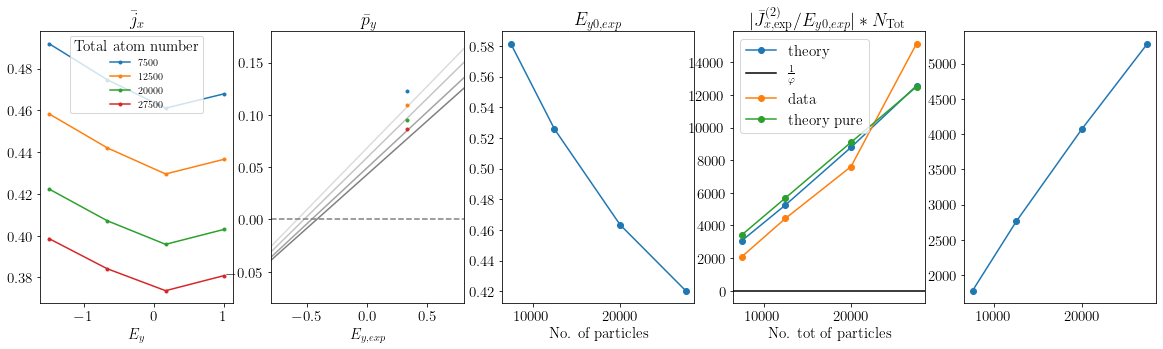

In [122]:
(L,tx,ty,chi,Ex,W,dt,tmax,T,data_times,data_atoms)=(200,1,4,0.32*np.pi,0.5,0.01,0.01,10,2,'data/','Atom_distributions/')
#(L,tx,ty,chi,Ex,W,dt,tmax,T,data_times,data_atoms)=(200,1,2,0.32*np.pi,0.5,0.01,0.1,10,2,'data/','Atom_distributions/')

fig,ax=plt.subplots(1,5,figsize=(20,5))

#M_tot_list=[5000,7500,10000,12500,15000,20000,25000,27500,30000,35000]
M_tot_list=[7500,12500,20000,27500]
Ey_list=np.linspace(-3,2,4)*Ex

list_Ey0=[]
JxAV=[]
for M_tot in M_tot_list:
    list_jx=[]
    list_py=[]
    for Ey in Ey_list:
        data=np.load(data_times+'_L_%d_MTOTAL_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f_Atom.npy'%(L,M_tot,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
        list_jx.append(data[0])
        list_py.append(-data[1])
    JxAV.append(np.average(list_jx))
    ax[0].plot(Ey_list,list_jx,'.-',label=M_tot)
    ax[1].plot(Ey_list*2,list_py,'.')
    #make and plot linear fit
    x,y=Ey_list*2,list_py
    coef = np.polyfit(x,y,1)
    print(coef)
    poly1d_fn = np.poly1d(coef) 
    #ax[1].plot(x,y)
    ax[1].plot(x,poly1d_fn(x),zorder=0,color='gray',alpha=M_tot/M_tot_list[-1])
    list_Ey0.append(-poly1d_fn[0]/poly1d_fn[1])

#print(JxAV)
#JX
ax[0].set_xlabel(r'$E_y$')
ax[0].set_title(r'$\bar j_x$')
ax[0].legend(title='Total atom number',fontsize=10)
#Py
ax[1].set_xlabel(r'$E_{y,exp}$')
ax[1].set_title(r'$\bar p_y$')
ax[1].axhline(0,linestyle='dashed',color='gray')
ax[1].set_xlim(-.8,.8)
ax[1].set_ylim(-.08,.18)
#EY0
ax[2].plot(M_tot_list,np.abs(list_Ey0),'o-')
np.savetxt('data/dataEy0exp.txt',np.array([M_tot_list,np.abs(list_Ey0)]).T)
ax[2].set_xlabel('No. of particles')
ax[2].set_title(r'$E_{y0,exp}$')
#RH
M_av_list=[]
for M_tot in M_tot_list:
    distributions=np.loadtxt(data_atoms+'%d.txt'%M_tot).T
    average_particle_number=distributions[1].dot(distributions[0])/np.sum(distributions[1])
    M_av_list.append(average_particle_number)
#print(M_av_list)
datay=[-(JxAV[x]/2)/(list_Ey0[x])*M_tot_list[x] for x in range (0,len(list_Ey0))]
np.savetxt('data/Hall_response_exp_comparison.txt',np.array([M_tot_list,datay]).T)
ax[3].plot(M_tot_list,datay,'o-',label="theory")
ax[3].set_xlabel('No. tot of particles ')
ax[3].set_title(r'$|\bar J^{(2)}_{x,\rm exp}/E_{y0,exp}|*N_{\rm Tot}$')
#ax[3].set_ylim(0,1/chi*1.1)
#Theoretical prediction
ax[3].axhline(1/chi,linestyle='solid',color='black',label=r'$\frac1\varphi$')
#exp data
data_exp=np.array(np.loadtxt('EXP_DATA/data2leg.txt')).T
ax[3].plot(data_exp[0],[data_exp[1][x]*data_exp[0][x] for x in range (0,len(data_exp[1]))] ,'o-',label="data")
#FIT
ax[3].plot(data_exp[0],[data_exp[0][x]/4/np.tan(chi/2) for x in range (0,len(data_exp[1]))] ,'o-',label="theory pure")
#ax[3].plot(data_exp[0],[ for ] for x in range (0,len(data_exp[1]))] ,'o-',label="data")

ax[3].legend()

#PRINT J_X Func N
datay=[(JxAV[x]/2)*M_tot_list[x] for x in range (0,len(list_Ey0))]
ax[4].plot(M_tot_list,datay,'-o')
np.savetxt('data/dataJxexp.txt',np.array([M_tot_list,datay]).T)

plt.savefig("figures/th_vs_exp_L_%d_tx_%.6f_ty_%.6f_chi_%.6f_Ex_%.6f_W_%.6f_dt_%.6f_tmax_%.1f_T_%.6f.pdf\
"%(L,tx,ty,chi,Ex,W,dt,tmax,T),format="pdf")

plt.show()
    

  ##### Plot dependence on transverse field $E_y$  but change $t_y$ and $T$

[0.06179633 0.03560097]
[0.06174401 0.03120705]
[0.06168946 0.02647421]
[0.06165246 0.02339103]


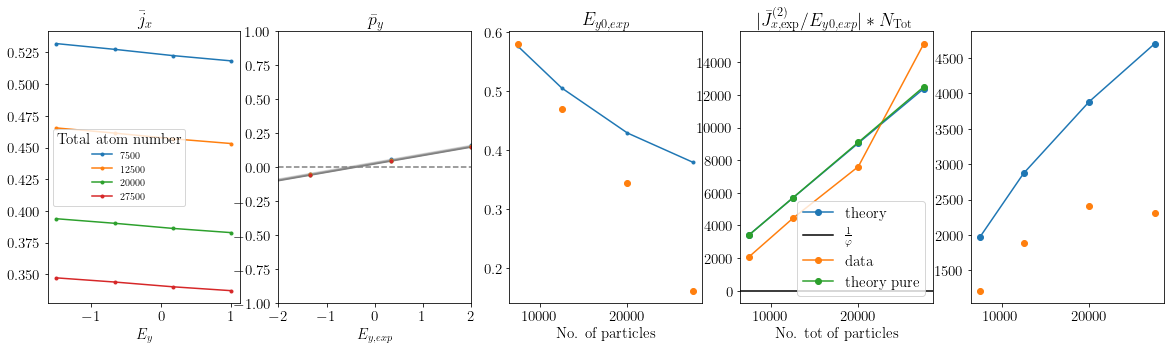

In [116]:
(L,tx,ty,chi,Ex,W,dt,tmax,T,data_times,data_atoms)=(200,1,8,0.32*np.pi,0.5,0.01,0.1,10,1.5,'data/','Atom_distributions/')

fig,ax=plt.subplots(1,5,figsize=(20,5))

M_tot_list=[7500,12500,20000,27500]
Ey_list=np.linspace(-3,2,4)*Ex

list_Ey0=[]
JxAV=[]
for M_tot in M_tot_list:
    list_jx=[]
    list_py=[]
    for Ey in Ey_list:
        data=np.load(data_times+'_L_%d_MTOTAL_%d_tx_%6f_ty_%.6f_chi_%.6f_Ex_%.6f_Ey_%.6f_\
W_%.6f_T_%.6f_dt_%.6f_tmax_%.6f_Atom.npy'%(L,M_tot,tx,ty,chi,Ex,Ey,W,T,dt,tmax))
        list_jx.append(data[0])
        list_py.append(-data[1])
    JxAV.append(np.average(list_jx))
    ax[0].plot(Ey_list,list_jx,'.-',label=M_tot)
    ax[1].plot(Ey_list*2,list_py,'.')
    #make and plot linear fit
    x,y=Ey_list*2,list_py
    coef = np.polyfit(x,y,1)
    print(coef)
    poly1d_fn = np.poly1d(coef) 
    #ax[1].plot(x,y)
    ax[1].plot(x,poly1d_fn(x),zorder=0,color='gray',alpha=M_tot/M_tot_list[-1])
    list_Ey0.append(-poly1d_fn[0]/poly1d_fn[1])

#print(JxAV)
#JX
ax[0].set_xlabel(r'$E_y$')
ax[0].set_title(r'$\bar j_x$')
ax[0].legend(title='Total atom number',fontsize=10)
#Py
ax[1].set_xlabel(r'$E_{y,exp}$')
ax[1].set_title(r'$\bar p_y$')
ax[1].axhline(0,linestyle='dashed',color='gray')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-1,1)
#EY0
ax[2].plot(M_tot_list,np.abs(list_Ey0),'.-')
data_exp=np.array(np.loadtxt('EXP_DATA/data_fig3a.txt')).T
ax[2].plot(data_exp[0],data_exp[1],'o')
np.savetxt('data/dataEy0exp_tytilde_%.6f_T_%.6f.txt'%(ty,T),np.array([M_tot_list,np.abs(list_Ey0)]).T)
ax[2].set_xlabel('No. of particles')
ax[2].set_title(r'$E_{y0,exp}$')
#RH
M_av_list=[]
for M_tot in M_tot_list:
    distributions=np.loadtxt(data_atoms+'%d.txt'%M_tot).T
    average_particle_number=distributions[1].dot(distributions[0])/np.sum(distributions[1])
    M_av_list.append(average_particle_number)
#print(M_av_list)
datay=[-(JxAV[x]/2)/(list_Ey0[x])*M_tot_list[x] for x in range (0,len(list_Ey0))]
np.savetxt('data/Hall_response_exp_comparison_tytilde_%.6f_T_%.6f.txt'%(ty,T),np.array([M_tot_list,datay]).T)
ax[3].plot(M_tot_list,datay,'o-',label="theory")
ax[3].set_xlabel('No. tot of particles ')
ax[3].set_title(r'$|\bar J^{(2)}_{x,\rm exp}/E_{y0,exp}|*N_{\rm Tot}$')
#ax[3].set_ylim(0,1/chi*1.1)
#Theoretical prediction
ax[3].axhline(1/chi,linestyle='solid',color='black',label=r'$\frac1\varphi$')
#exp data
data_exp=np.array(np.loadtxt('EXP_DATA/data2leg.txt')).T
ax[3].plot(data_exp[0],[data_exp[1][x]*data_exp[0][x] for x in range (0,len(data_exp[1]))] ,'o-',label="data")
#FIT
ax[3].plot(data_exp[0],[data_exp[0][x]/4/np.tan(chi/2) for x in range (0,len(data_exp[1]))] ,'o-',label="theory pure")
#ax[3].plot(data_exp[0],[ for ] for x in range (0,len(data_exp[1]))] ,'o-',label="data")

ax[3].legend()

#PRINT J_X Func N
datay=[(JxAV[x]/2)*M_tot_list[x] for x in range (0,len(list_Ey0))]
ax[4].plot(M_tot_list,datay,'-o')
np.savetxt('data/dataJxexp_tytilde_%.6f_T_%.6f.txt'%(ty,T),np.array([M_tot_list,datay]).T)
data_exp=np.array(np.loadtxt('EXP_DATA/data_fig3b.txt')).T
ax[4].plot(data_exp[0],data_exp[1],'o')

plt.savefig("figures/th_vs_exp_L_%d_tx_%.6f_ty_%.6f_chi_%.6f_Ex_%.6f_W_%.6f_dt_%.6f_tmax_%.1f_T_%.6f.pdf\
"%(L,tx,ty,chi,Ex,W,dt,tmax,T),format="pdf")

plt.show()
    

# TH vs EXP fig 3 a b 

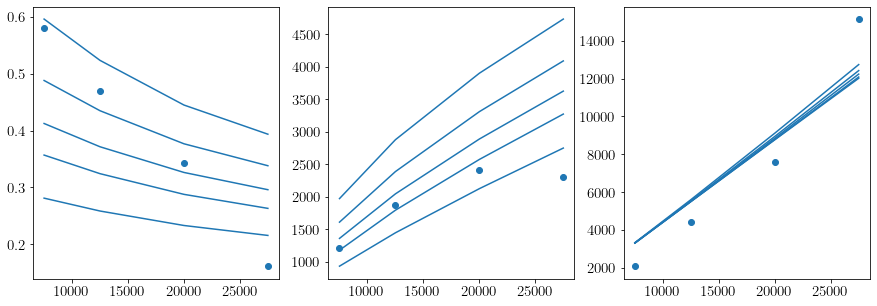

In [189]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

T_list=[1.5,2,2.5,3,4]
ty=6
#Ey

data_exp=np.array(np.loadtxt('EXP_DATA/data_fig3a.txt')).T
ax[0].plot(data_exp[0],data_exp[1],'o')


for T in T_list:
    data_tup=np.loadtxt('data/dataEy0exp_tytilde_%.6f_T_%.6f.txt'%(ty,T)).T
    ax[0].plot(data_tup[0],data_tup[1],'-C0')

#Jx

data_exp=np.array(np.loadtxt('EXP_DATA/data_fig3b.txt')).T
ax[1].plot(data_exp[0],data_exp[1],'o')

for T in T_list:
    data_tup=np.loadtxt('data/dataJxexp_tytilde_%.6f_T_%.6f.txt'%(ty,T)).T
    ax[1].plot(data_tup[0],data_tup[1],'-C0')

#Hall resistance

data_exp=np.array(np.loadtxt('EXP_DATA/data2leg.txt')).T
ax[2].plot(data_exp[0],[data_exp[1][x]*data_exp[0][x] for x in range (0,len(data_exp[1]))] ,'o',label="data")

for T in T_list:
    data_tup=np.loadtxt('data/Hall_response_exp_comparison_tytilde_%.6f_T_%.6f.txt'%(ty,T)).T
    ax[2].plot(data_tup[0],data_tup[1],'-C0')
    
    
plt.show()


